<a href="https://colab.research.google.com/github/Quantyca/demo-ateam-ai-misc/blob/master/image-processing/peppers-serving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Peppers: serving

Prepariamo l'ambiente colab installando fast.ai e le relative dipendenze ...

In [0]:
#!curl https://course-v3.fast.ai/setup/colab | bash

In [0]:
!pip list | grep fastai

fastai                   1.0.52               


In [0]:
!pwd && ls -l

/content
total 248244
-rw-r--r-- 1 root root      2584 Jun  7 15:10 adc.json
lrwxrwxrwx 1 root root        18 Jun  7 13:23 data -> /root/.fastai/data
drwx------ 4 root root      4096 Jun  7 15:09 gdrive
lrwxrwxrwx 1 root root        20 Jun  7 13:23 models -> /root/.fastai/models
drwxrwxr-x 6 1000 1000      4096 Jun  7 13:34 peppersdataset
-rw-r--r-- 1 root root 254183294 Jun  7 13:33 peppersdataset.tar.gz


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [0]:
from fastai import *
from fastai.vision import *

# Serving

In [0]:
path = Path('.')
path.ls()

[PosixPath('.config'),
 PosixPath('data'),
 PosixPath('adc.json'),
 PosixPath('models'),
 PosixPath('gdrive'),
 PosixPath('peppersdataset'),
 PosixPath('peppersdataset.tar.gz')]

In [0]:
classes = ['banana', 'bell', 'carolina_reaper', 'cayenne', 'cubanelle', 'guajillo', 'habanero', 'jalapeno', 'malagueta', 'naga_morich', 'pimento', 'red_savina', 'scotch_bonnet']
tfms = get_transforms()
size = 224
stats = imagenet_stats

## Serve resnet50 model

In [0]:
# per resnet50 abbiamo scalato le immagini a 400x400 pixel anzichè 224x224 come avevamo fatto per resnet34
size = 400

Preparo il data bunch:

In [0]:
??ImageDataBunch.single_from_classes

In [0]:
#data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=400, bs=32).normalize(imagenet_stats)
data50 = ImageDataBunch.single_from_classes(path, classes, ds_tfms=tfms, size=size).normalize(stats)

Scarico il modello e lo uso per inizializare la nuova rete:

In [0]:
_=download_url('https://storage.googleapis.com/ml_quantyca_it/personal/andrea/spicyai/models/pep-stg1-rn50.pth','./models/pep-stg1-rn50.pth', overwrite=False)

In [0]:
!ls -l /root/.fastai/models

total 548224
-rw-r--r-- 1 root root  91831810 Jun  7 13:58 pep-stg1-rn34.pth
-rw-r--r-- 1 root root 120158291 Jun  7 15:06 pep-stg1-rn50.pth
-rw-r--r-- 1 root root 261984577 Jun  7 14:14 pep-stg2-rn34.pth
-rw-r--r-- 1 root root  87396915 Jun  7 14:03 tmp.pth


In [0]:
learn50 = create_cnn(data50, models.resnet50, pretrained=False).load('pep-stg1-rn50')

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


Carico un' immagine dal disco locale e faccio inferenza usando il modello:

In [0]:
from google.colab import files
uploaded = files.upload()

Saving ginos-prosciutto-e-funghi-1366x852_1.jpg to ginos-prosciutto-e-funghi-1366x852_1.jpg


In [0]:
first_file_uploaded = list(uploaded)[0]
img = open_image(first_file_uploaded) 
first_file_uploaded, img

('ginos-prosciutto-e-funghi-1366x852_1.jpg', Image (3, 852, 1366))

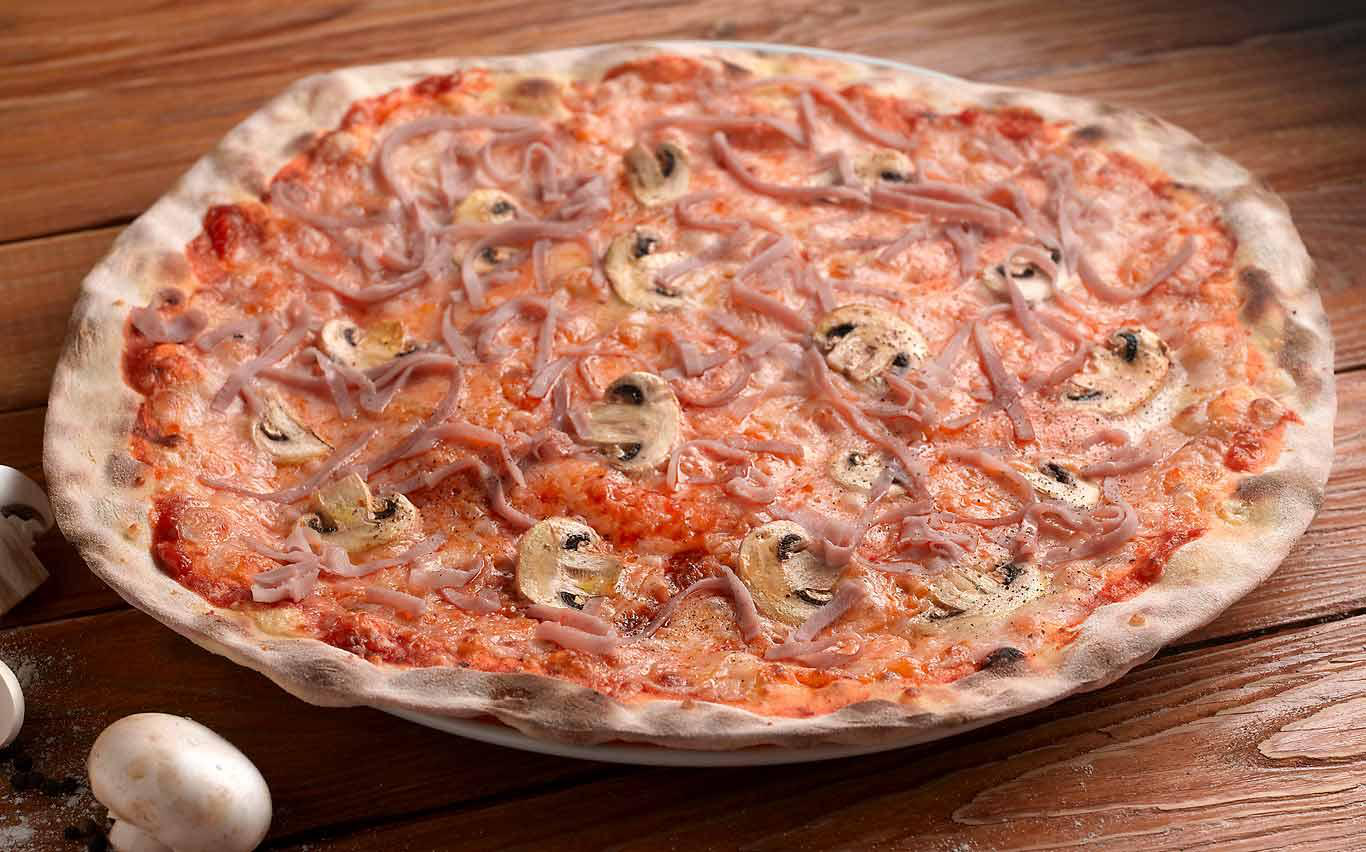

In [0]:
img

In [0]:
pred_class,pred_idx,losses = learn50.predict(img)
pred_class

Category guajillo

In [0]:
predictions = sorted(zip(classes, map(float, losses)), key=lambda p: p[1], reverse=True)
predictions

[('guajillo', 0.2919190227985382),
 ('cubanelle', 0.2715935707092285),
 ('banana', 0.23279735445976257),
 ('habanero', 0.12206725031137466),
 ('bell', 0.05094246193766594),
 ('carolina_reaper', 0.011125546880066395),
 ('cayenne', 0.006432513240724802),
 ('jalapeno', 0.004843424074351788),
 ('malagueta', 0.0029274197295308113),
 ('pimento', 0.0021839579567313194),
 ('scotch_bonnet', 0.0021384479478001595),
 ('naga_morich', 0.0007773229735903442),
 ('red_savina', 0.00025175887276418507)]

In [0]:
# END